In [1]:
# This is a Julia notebook, I chose this because it is pretty like python but still very fast
using Plots

# Calculus Based Linear Regression
Let's say we have a series of points $(x, y)$ and we want to draw a line of best fit. Our first step is the definition of the cost function, from a line. A high cost is a bad line, a low cost is a good line. Theoretically, there will be a best line that, if either variable $m$ or $b$ were to be changed, the cost would only increase.

The single variable cost function looks like a parabola, and similar in 3D with a two variable function. Our function is:
$$
C(m, b) = \frac{1}{n} \sum_{i = 1}^{n}{(y_i - (mx_i + b))^2} \\
C(m, b) = \frac{1}{n} \sum_{i = 1}^{n}{(y_i - mx_i - b)^2} \\
C(m, b) = \frac{1}{n} \sum_{i = 1}^{n}{y_i^2 - 2mx_iy_i - 2by_i + m^2x_i^2 + 2mbx_i + b^2} \\
C(m, b) = \frac{1}{n} \sum{y_i^2} - 2m\sum{x_iy_i} - 2b\sum{y_i} + m^2\sum{x_i^2} +2mb\sum{x_i} + nb^2 \\
$$

Let's simplify this, because with the presence of the $\frac{1}{n}$ we can convert all the $\sum$ to averages. We'll define the function $a(\vec{x})$ to be the average of $\vec{x}$.

$$
a(\vec{x}) = \frac{1}{n} \sum_{i = 1}^{n}{x_i} \\
C(m, b) = a(y^2) - 2ma(xy) - 2ba(y) + m^2a(x^2) + 2mba(x) +b^2 \\
$$

Here comes the solution. With our condition that if we had an ideal line, if either $m$ or $b$ were slightly nudged, $C(m, b)$ would have to go up. Also, we know that for every line, there has to be a worse line. Therefore there can be no global maximum. We can take two derivatives, $\dfrac{\partial{C}}{\partial{m}}$, and $\dfrac{\partial{C}}{\partial{b}}$. Both of these must be 0 to have an ideal solution.

$$
\dfrac{\partial{C}}{\partial{m}} = 0 \\
-2a(xy) + 2ma(x^2) + 2ba(x) = 0 \\ \\
\dfrac{\partial{C}}{\partial{b}} = 0 \\
-2a(y) + 2ma(x) + 2b = 0 \\
$$

$$
-a(xy) + ma(x^2) + ba(x) = 0 \\
-a(y) + ma(x) + b = 0 \\
$$

Multiply both sides by $-a(x)$.

$$
-a(xy) + ma(x^2) + ba(x) = 0 \\
a(y)a(x) - ma(x)^2 - ba(x) = 0 \\
\\
a(y)a(x) - a(xy) + ma(x^2) - ma(x)^2 = 0 \\
m(a(x^2) - a(x)^2) = a(xy) - a(y)a(x) \\
m = \frac{a(xy) - a(y)a(x)}{a(x^2) - a(x)^2}
$$

Let's test this out on a dataset with a slope of 2.1 and y-intercept of 0.

In [2]:
x = [0, 1, 2, 3, 4]
y = x .* 2.1
@assert size(x) == size(y)
n = size(x)[1]

axy = 0.0
ay = 0.0
ax2 = 0.0
ax = 0.0
for i in eachindex(x)
    axy += x[i] * y[i]
    ay += y[i]
    ax += x[i]
    ax2 += x[i]^2
end

axy /= n
ay /= n
ax2 /= n
ax /= n

println((axy - ay * ax) / (ax2 - ax^2))

2.0999999999999996


I was amazed that this worked first try.
Anyways, let's grab our equations from above and this time solve for $b$.

$$
(-a(xy) + ma(x^2) + ba(x) = 0) * a(x) \\
(-a(y) + ma(x) + b = 0) * -a(x^2)\\
\\
-a(xy)a(x) + ma(x^2)a(x) + ba(x)^2 = 0 \\
a(y)a(x^2) - ma(x)a(x^2) -ba(x^2) = 0\\
\\
-a(xy)a(x) + ba(x)^2 + a(y)a(x^2) -ba(x^2) = 0 \\
b(a(x)^2 - a(x^2)) = a(xy)a(x) - a(y)a(x^2) \\
b = \frac{a(xy)a(x) - a(y)a(x^2)}{a(x)^2 - a(x^2)} \\
$$

Thankfully, we have precomputed these values. Let's see if we get 0.

In [3]:
println((axy * ax - ay * ax2) / (ax^2 - ax2))

1.7763568394002505e-15


This value comes about as a result of computers being imperfect. But it is practically 0. Let's implement a full fledged function to take in 2 arrays, $x$ and $y$, and then return $m$ and $b$.

In [4]:
function fit(x, y)
    @assert size(x) == size(y)
    n = size(x)[1]
    # Precomputing averages
    axy = 0.0
    ay = 0.0
    ax2 = 0.0
    ax = 0.0
    for i in eachindex(x)
        axy += x[i] * y[i]
        ay += y[i]
        ax += x[i]
        ax2 += x[i]^2
    end

    axy /= n
    ay /= n
    ax2 /= n
    ax /= n
    
    m = (axy - ay * ax) / (ax2 - ax^2)
    b = (axy * ax - ay * ax2) / (ax^2 - ax2)
    return [m, b]
end

fit (generic function with 1 method)

In [5]:
x = range(0, stop = 10, step = 0.1)
y = x .* 4.2 .+ 9.3
m, b = fit(x, y)
println("y = ", round(m, digits = 2), "x + ", round(b, digits = 2))

y = 4.2x + 9.3


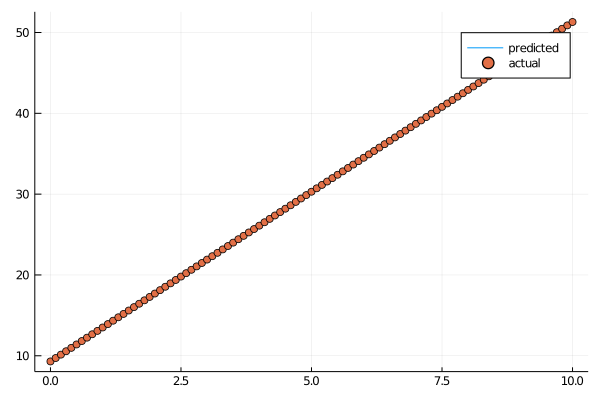

In [6]:
plt = plot(x, x .* m .+ b, label = "predicted")
scatter!(x, y, label = "actual", w = 0.1)

## A more varying dataset

Let's make a random dataset, so that we can't alter the system via bias. We'll base it off a random slope and y intercept, and also add some noise to the final result.

$$
-500 \leq m \leq 500 \\
-1000 \leq b \leq 1000 \\
$$

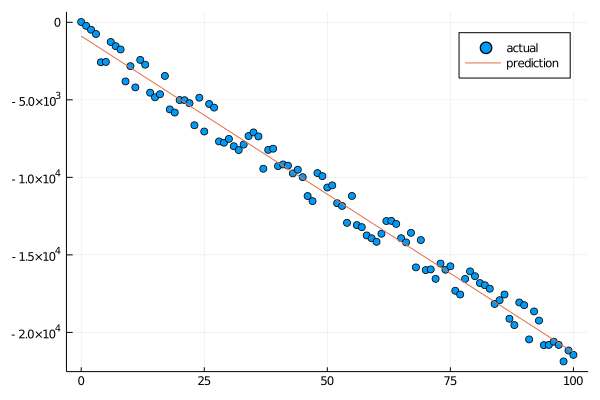

In [7]:
slope = rand(Float64) * 1000 - 500
yint = rand(Float64) * 2000 - 1000

x = range(0, stop = 100, step = 1)
noise = 10slope .* (sin.(rand(Float64, size(x)) .* x)).^2
y = x .* slope .+ yint .+ noise

scatter(x, y, label = "actual")

m, b = fit(x, y)
plot!(x, (m .* x .+ b), label = "prediction")

In [8]:
println("Original slope: ", slope, " Original y-intercept: ", yint)
println("Predicted slope: ", m, " Predicted y-intercept: ", b)

Original slope: -202.90307265355966 Original y-intercept: 19.606616085310748
Predicted slope: -204.03895861411905 Predicted y-intercept: -891.1164838619092


As you can see, the algorithm works quickly and effectively. Although, the noise being sensitive to x values of 0 certainly affects the y-intercept's accuracy. What if we tried this approach on a nonlinear dataset? How about $f(x) = x^2$?

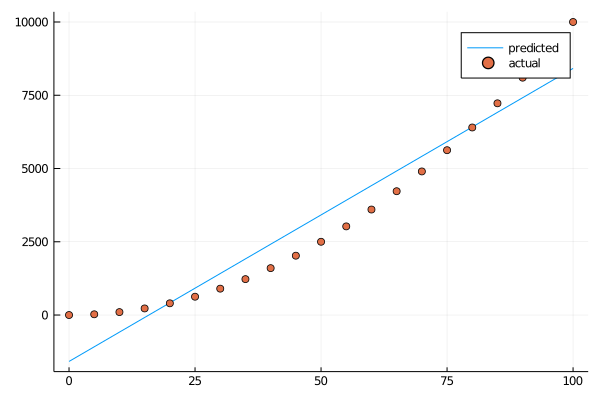

In [9]:
x = range(0, stop = 100, step = 5)
y = x .^ 2

m, b = fit(x, y)
plot(x, m .* x .+ b, label = "predicted")
scatter!(x, y, label = "actual")

Pretty bad fit that gets worse as time goes on. Now instead of rederiving the entire equation, how about we linearize the original data? What if we fit to $x^2$ instead of $x$?

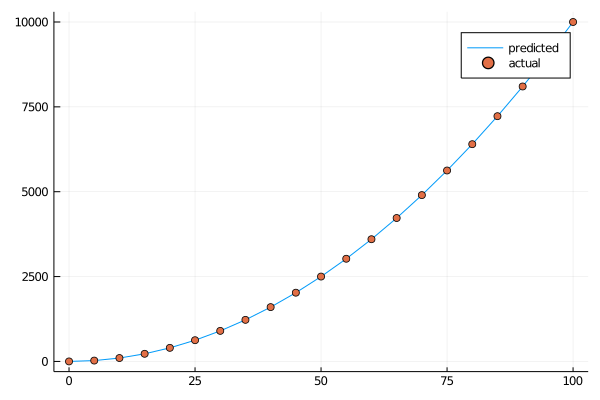

In [10]:
m, b = fit(x.^2, y)

plot(x, (m .* (x.^2) .+ b), label = "predicted")
scatter!(x, y, label = "actual")

With some simple manipulation we were able to create a linear model that unknowingly fits nonlinear data. We can do this to any function that is easily invertible. For example: $e^x$ to $\ln(x)$. This works, because $f^-1(f(x)) = x$, which is certainly linear.

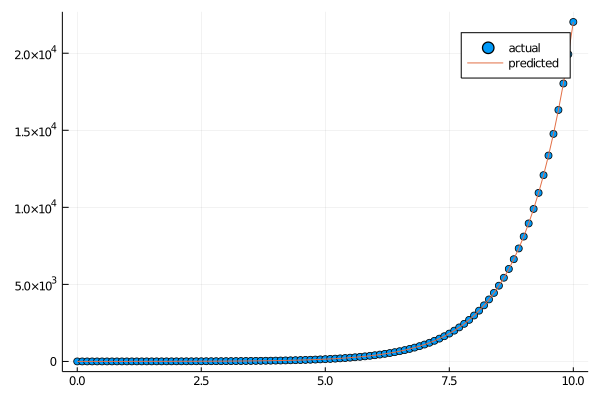

In [11]:
e = MathConstants.e
x = range(0, stop = 10, step = 0.1)
y = e.^x
scatter(x, y, label = "actual")

m, b = fit(x, log.(y))
plot!(x, e.^(m .* x .+ b), label = "predicted")

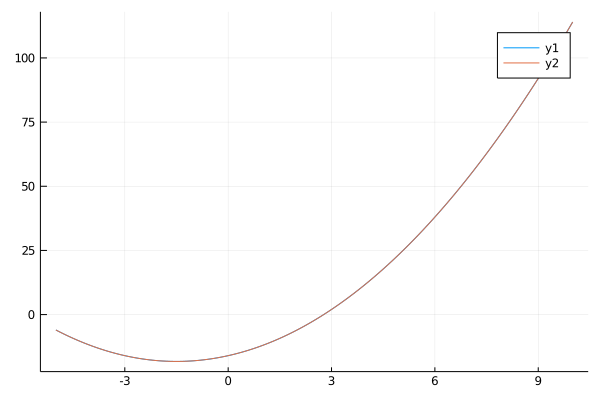

In [12]:
x = range(-5, stop = 10, step = 0.1)
y = x.^2 .+ 3x .- 16
plot(x, y)
plot!(x, y)

# Least Squares Quadratic Regression
This one will be a lot tougher. For any parabola, there are 3 identifying pieces of information: $a$, $b$, and $c$ in $ax^2 + bx + c$. We will take the same approach:

1. Define a cost function
2. Set each partial derivative of the cost function equal to 0
3. Solve the system of equations for each variable

Let's start with the simple cost function.
$$
C(a, b, c) = \frac{1}{n}\sum_{i=1}^{n}{(y_i - (ax_i^2 + bx_i + c))^2} \\
C(a, b, c) = \frac{1}{n}\sum_{i=1}^{n}{(y_i - ax_i^2 - bx_i - c)^2} \\
C(a, b, c) = \frac{1}{n}\sum_{i=1}^{n}{y_i^2 - 2ax_i^2y_i - 2bx_iy_i - 2cy_i + a^2x_i^4 + 2abx_i^3 + 2acx_i^2 + 2bc + c^2} \\
$$

Now we'll do the same as above except with a new name for the average function, a simple bar like so: $\overline{x}$

$$
\overline{y^2} -2a\overline{x^2y} -2b\overline{xy} -2c\overline{y} +a^2\overline{x^4} +2ab\overline{x^3} +2ac\overline{x^2} +b^2\overline{x^2} +2bc\overline{x} +c^2
$$

Time for partial derivatives.

$$
\dfrac{\partial{C}}{\partial{a}} = 0 \\
\dfrac{\partial{C}}{\partial{b}} = 0 \\
\dfrac{\partial{C}}{\partial{c}} = 0 \\
$$

$$
\dfrac{\partial{C}}{\partial{a}} = -2\overline{x^2y} +2a\overline{x^4} +2b\overline{x^3} +2c\overline{x^2} = 0 \\
\dfrac{\partial{C}}{\partial{b}} = -2\overline{xy} +2a\overline{x^3} +2b\overline{x^2} +2c\overline{x} = 0 \\
\dfrac{\partial{C}}{\partial{c}} = -2\overline{y} +2a\overline{x^2} +2b\overline{x} +2c = 0 \\
$$
Let's divide everything by 2 to get:
$$
-\overline{x^2y} +a\overline{x^4} +b\overline{x^3} +c\overline{x^2} = 0 \\
-\overline{xy} +a\overline{x^3} +b\overline{x^2} +c\overline{x} = 0 \\
-\overline{y} +a\overline{x^2} +b\overline{x} +c = 0 \\
$$

### Solving for $a$
Now we have a system of equations, and we need to eliminate both $b$ and $c$ to get $a$. We will eliminate them from the top and bottom using the middle, and then solve that system of 2 equations to get $a$. We'll also switch to using $\overline{x_2}$ instead of $\overline{x^2}$ because it is easier to read.
$$
\begin{cases}
(-\overline{x_2y} +a\overline{x_4} +b\overline{x_3} +c\overline{x_2} = 0) * \overline{x_2} \\
(-\overline{xy} +a\overline{x_3} +b\overline{x_2} +c\overline{x} = 0) * -\overline{x_3} \\
\end{cases}
\\
\\
\begin{cases}
-\overline{x_2y}*\overline{x_2} +a\overline{x_4}*\overline{x_2} +b\overline{x_3}*\overline{x_2} +c\overline{x_2}^2 = 0 \\
\overline{xy}*\overline{x_3} -a\overline{x_3}^2 -b\overline{x_2}*\overline{x_3} -c\overline{x}*\overline{x_3} = 0 \\
\end{cases}
$$

$$
-\overline{x_2y}*\overline{x_2} +a\overline{x_4}*\overline{x_2} +c\overline{x_2}^2 +\overline{xy}*\overline{x_3} -a\overline{x_3}^2 -c\overline{x}*\overline{x_3} = 0 \\
$$

Let's take the bottom 2 and eliminate b again.
$$
\begin{cases}
(-\overline{xy} +a\overline{x_3} +b\overline{x_2} +c\overline{x} = 0) * \overline{x} \\
(-\overline{y} +a\overline{x_2} +b\overline{x} +c = 0) * -\overline{x_2}\\
\end{cases}
\\
\begin{cases}
(-\overline{xy}*\overline{x}) +(a\overline{x_3}*\overline{x}) +(b\overline{x_2}*\overline{x}) +(c\overline{x}^2) = 0 \\
(\overline{y}*\overline{x_2}) -(a\overline{x_2}^2) -(b\overline{x}*\overline{x_2}) -(c\overline{x_2})= 0 \\
\end{cases}
\\
(-\overline{xy}*\overline{x}) +(a\overline{x_3}*\overline{x}) +(c\overline{x}^2) +(\overline{y}*\overline{x_2}) -(a\overline{x_2}^2) -(c\overline{x_2}) = 0
$$

Finally, we can take those two equations and eliminate $c$, then solve for $a$.
$$
\begin{cases}
-(\overline{x_2y}*\overline{x_2}) +(a\overline{x_4}*\overline{x_2}) +(c\overline{x_2}^2) +(\overline{xy}*\overline{x_3}) -(a\overline{x_3}^2) -(c\overline{x}*\overline{x_3}) = 0 \\
(-\overline{xy}*\overline{x}) +(a\overline{x_3}*\overline{x}) +(c\overline{x}^2) +(\overline{y}*\overline{x_2}) -(a\overline{x_2}^2) -(c\overline{x_2}) = 0
\end{cases}
$$

$$
\begin{cases}
(a(\overline{x_4}*\overline{x_2} - \overline{x_3}^2) + c(\overline{x_2}^2 - \overline{x}*\overline{x_3}) -(\overline{x_2y}*\overline{x_2}) +(\overline{xy}*\overline{x_3}) = 0) * (\overline{x}^2 - \overline{x_2}) \\
(a(\overline{x_3}*\overline{x} - \overline{x_2}^2) + c(\overline{x}^2 - \overline{x_2}) -(\overline{xy}*\overline{x}) +(\overline{y}*\overline{x_2}) = 0) * -(\overline{x_2}^2 - \overline{x}*\overline{x_3})
\end{cases}
\\
\\
\begin{cases}
a(\overline{x_4}*\overline{x_2} - \overline{x_3}^2)(\overline{x}^2 - \overline{x_2}) + c(\overline{x_2}^2 - \overline{x}*\overline{x_3})(\overline{x}^2 - \overline{x_2}) -(\overline{x_2y}*\overline{x_2})(\overline{x}^2 - \overline{x_2}) +(\overline{xy}*\overline{x_3})(\overline{x}^2 - \overline{x_2}) = 0 \\
\\
a(\overline{x_3}*\overline{x} - \overline{x_2}^2)(\overline{x}*\overline{x_3} - \overline{x_2}^2) + c(\overline{x}^2 - \overline{x_2})(\overline{x}*\overline{x_3} - \overline{x_2}^2) -(\overline{xy}*\overline{x})(\overline{x}*\overline{x_3} - \overline{x_2}^2) +(\overline{y}*\overline{x_2})(\overline{x}*\overline{x_3} - \overline{x_2}^2) = 0
\end{cases}
$$

$$
a(\overline{x_4}*\overline{x_2} - \overline{x_3}^2)(\overline{x}^2 - \overline{x_2}) -(\overline{x_2y}*\overline{x_2})(\overline{x}^2 - \overline{x_2}) +(\overline{xy}*\overline{x_3})(\overline{x}^2 - \overline{x_2}) + a(\overline{x_3}*\overline{x} - \overline{x_2}^2)(\overline{x}*\overline{x_3} - \overline{x_2}^2) -(\overline{xy}*\overline{x})(\overline{x}*\overline{x_3} - \overline{x_2}^2) +(\overline{y}*\overline{x_2})(\overline{x}*\overline{x_3} - \overline{x_2}^2) = 0
\\
a((\overline{x_4}*\overline{x_2} - \overline{x_3}^2)(\overline{x}^2 - \overline{x_2}) + (\overline{x_3}*\overline{x} - \overline{x_2}^2)(\overline{x}*\overline{x_3} - \overline{x_2}^2)) = (\overline{x_2y}*\overline{x_2})(\overline{x}^2 - \overline{x_2}) -(\overline{xy}*\overline{x_3})(\overline{x}^2 - \overline{x_2}) +(\overline{xy}*\overline{x})(\overline{x}*\overline{x_3} - \overline{x_2}^2) -(\overline{y}*\overline{x_2})(\overline{x}*\overline{x_3} - \overline{x_2}^2)\\
a = \frac{(\overline{x_2y}*\overline{x_2})(\overline{x}^2 - \overline{x_2}) -(\overline{xy}*\overline{x_3})(\overline{x}^2 - \overline{x_2}) +(\overline{xy}*\overline{x})(\overline{x}*\overline{x_3} - \overline{x_2}^2) -(\overline{y}*\overline{x_2})(\overline{x}*\overline{x_3} - \overline{x_2}^2)}{(\overline{x_4}*\overline{x_2} - \overline{x_3}^2)(\overline{x}^2 - \overline{x_2}) + (\overline{x_3}*\overline{x} - \overline{x_2}^2)(\overline{x}*\overline{x_3} - \overline{x_2}^2)}
$$

Nice and simple :)

### Solving for $c$
Now we will do the same thing, except only have to do half the work because we already have equations with $b$ eliminated!
$$
\begin{cases}
(a(\overline{x_4}*\overline{x_2} - \overline{x_3}^2) + c(\overline{x_2}^2 - \overline{x}*\overline{x_3}) -(\overline{x_2y}*\overline{x_2}) +(\overline{xy}*\overline{x_3}) = 0) * (\overline{x_3}*\overline{x} - \overline{x_2}^2) \\
\\
(a(\overline{x_3}*\overline{x} - \overline{x_2}^2) + c(\overline{x}^2 - \overline{x_2}) -(\overline{xy}*\overline{x}) +(\overline{y}*\overline{x_2}) = 0) * -(\overline{x_4}*\overline{x_2} - \overline{x_3}^2)
(\overline{x_3}^2 - \overline{x_4}*\overline{x_2})
\end{cases}
\\
c(\overline{x_2}^2 - \overline{x}*\overline{x_3})(\overline{x_3}*\overline{x} - \overline{x_2}^2) -(\overline{x_2y}*\overline{x_2})(\overline{x_3}*\overline{x} - \overline{x_2}^2) +(\overline{xy}*\overline{x_3})(\overline{x_3}*\overline{x} - \overline{x_2}^2) + c(\overline{x}^2 - \overline{x_2})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2}) -(\overline{xy}*\overline{x})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2}) +(\overline{y}*\overline{x_2})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2}) = 0
\\
c((\overline{x_2}^2 - \overline{x}*\overline{x_3})(\overline{x_3}*\overline{x} - \overline{x_2}^2) + (\overline{x}^2 - \overline{x_2})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2})) -(\overline{x_2y}*\overline{x_2})(\overline{x_3}*\overline{x} - \overline{x_2}^2) +(\overline{xy}*\overline{x_3})(\overline{x_3}*\overline{x} - \overline{x_2}^2) -(\overline{xy}*\overline{x})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2}) +(\overline{y}*\overline{x_2})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2}) = 0
\\
c((\overline{x_2}^2 - \overline{x}*\overline{x_3})(\overline{x_3}*\overline{x} - \overline{x_2}^2) + (\overline{x}^2 - \overline{x_2})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2})) = (\overline{x_2y}*\overline{x_2})(\overline{x_3}*\overline{x} - \overline{x_2}^2) -(\overline{xy}*\overline{x_3})(\overline{x_3}*\overline{x} - \overline{x_2}^2) +(\overline{xy}*\overline{x})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2}) -(\overline{y}*\overline{x_2})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2})
\\
c = \frac{(\overline{x_2y}*\overline{x_2})(\overline{x_3}*\overline{x} - \overline{x_2}^2) -(\overline{xy}*\overline{x_3})(\overline{x_3}*\overline{x} - \overline{x_2}^2) +(\overline{xy}*\overline{x})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2}) -(\overline{y}*\overline{x_2})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2})}{(\overline{x_2}^2 - \overline{x}*\overline{x_3})(\overline{x_3}*\overline{x} - \overline{x_2}^2) + (\overline{x}^2 - \overline{x_2})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2})}
$$

### Solving for $b$
From here, we have two choices. Either we take the easy route and compute $b$ in terms of $a$ and $c$. Or, we redo the elimination of two variables from the top, and get a general equation that allows for specifically solving the $b$ values, which would be much more flexible. We'll do the second.

$$
\begin{cases}
(a\overline{x_4} +b\overline{x_3} +c\overline{x_2} = \overline{x_2y}) * \overline{x} \\
(a\overline{x_3} +b\overline{x_2} +c\overline{x} = \overline{xy}) * -\overline{x_2} \\
\end{cases}
\\
\begin{cases}
a(\overline{x_4}*\overline{x}) +b(\overline{x_3}*\overline{x}) +c(\overline{x}*\overline{x_2}) = (\overline{x_2y}*\overline{x}) \\
a(\overline{x_3}*-\overline{x_2}) +b(-\overline{x_2}^2) +c(-\overline{x}*\overline{x_2}) = (-\overline{xy}*\overline{x_2}) \\
\end{cases}
\\
a(\overline{x_4}*\overline{x} - \overline{x_3}*\overline{x_2}) + b(\overline{x_3}*\overline{x} - \overline{x_2}^2) = \overline{x_2y}*\overline{x} - \overline{xy}*\overline{x_2} \\
$$

Now another elimination fromt the bottom two.
$$
\begin{cases}
(a\overline{x_3} +b\overline{x_2} +c\overline{x} = \overline{xy}) \\
(a\overline{x_2} +b\overline{x} +c = \overline{y}) * -\overline{x} \\
\end{cases}
\\
\begin{cases}
a(\overline{x_3}) +b(\overline{x_2}) +c(\overline{x}) = \overline{xy} \\
a(-\overline{x_2}*\overline{x}) +b(-\overline{x}^2) +c(-\overline{x}) = -\overline{x}*\overline{y} \\
\end{cases}
\\
a(\overline{x_3} - \overline{x_2}*\overline{x}) + b(\overline{x_2} - \overline{x}^2) = \overline{xy} - \overline{x}*\overline{y}
$$

Now we get rid of $a$.
$$
\begin{cases}
(a(\overline{x_4}*\overline{x} - \overline{x_3}*\overline{x_2}) + b(\overline{x_3}*\overline{x} - \overline{x_2}^2) = \overline{x_2y}*\overline{x} - \overline{xy}*\overline{x_2}) * (\overline{x_3} - \overline{x_2}*\overline{x}) \\
(a(\overline{x_3} - \overline{x_2}*\overline{x}) + b(\overline{x_2} - \overline{x}^2) = \overline{xy} - \overline{x}*\overline{y}) * (\overline{x_3}*\overline{x_2} - \overline{x_4}*\overline{x})
\end{cases}
\\
$$

$$
\begin{cases}
a(\overline{x_4}*\overline{x} - \overline{x_3}*\overline{x_2})(\overline{x_3} - \overline{x_2}*\overline{x}) + b(\overline{x_3}*\overline{x} - \overline{x_2}^2)(\overline{x_3} - \overline{x_2}*\overline{x}) = (\overline{x_2y}*\overline{x} - \overline{xy}*\overline{x_2})(\overline{x_3} - \overline{x_2}*\overline{x}) \\
a(\overline{x_3} - \overline{x_2}*\overline{x})(\overline{x_3}*\overline{x_2} - \overline{x_4}*\overline{x}) + b(\overline{x_2} - \overline{x}^2)(\overline{x_3}*\overline{x_2} - \overline{x_4}*\overline{x}) = (\overline{xy} - \overline{x}*\overline{y})(\overline{x_3}*\overline{x_2} - \overline{x_4}*\overline{x})
\end{cases}
$$
Add them and we get:
$$
b((\overline{x_3}*\overline{x} - \overline{x_2}^2)(\overline{x_3} - \overline{x_2}*\overline{x}) + (\overline{x_2} - \overline{x}^2)(\overline{x_3}*\overline{x_2} - \overline{x_4}*\overline{x})) = (\overline{x_2y}*\overline{x} - \overline{xy}*\overline{x_2})(\overline{x_3} - \overline{x_2}*\overline{x}) + (\overline{xy} - \overline{x}*\overline{y})(\overline{x_3}*\overline{x_2} - \overline{x_4}*\overline{x})
$$

$$
b = \frac{(\overline{x_2y}*\overline{x} - \overline{xy}*\overline{x_2})(\overline{x_3} - \overline{x_2}*\overline{x}) + (\overline{xy} - \overline{x}*\overline{y})(\overline{x_3}*\overline{x_2} - \overline{x_4}*\overline{x})}{(\overline{x_3}*\overline{x} - \overline{x_2}^2)(\overline{x_3} - \overline{x_2}*\overline{x}) + (\overline{x_2} - \overline{x}^2)(\overline{x_3}*\overline{x_2} - \overline{x_4}*\overline{x})}
$$

## Final Solution
Let's collect all the equations, $a$, $b$, and $c$ for our final answer.
$$
a = \frac{(\overline{x_2y}*\overline{x_2})(\overline{x}^2 - \overline{x_2}) -(\overline{xy}*\overline{x_3})(\overline{x}^2 - \overline{x_2}) +(\overline{xy}*\overline{x})(\overline{x}*\overline{x_3} - \overline{x_2}^2) -(\overline{y}*\overline{x_2})(\overline{x}*\overline{x_3} - \overline{x_2}^2)}{(\overline{x_4}*\overline{x_2} - \overline{x_3}^2)(\overline{x}^2 - \overline{x_2}) + (\overline{x_3}*\overline{x} - \overline{x_2}^2)(\overline{x}*\overline{x_3} - \overline{x_2}^2)}
\\
b = \frac{(\overline{x_2y}*\overline{x} - \overline{xy}*\overline{x_2})(\overline{x_3} - \overline{x_2}*\overline{x}) + (\overline{xy} - \overline{x}*\overline{y})(\overline{x_3}*\overline{x_2} - \overline{x_4}*\overline{x})}{(\overline{x_3}*\overline{x} - \overline{x_2}^2)(\overline{x_3} - \overline{x_2}*\overline{x}) + (\overline{x_2} - \overline{x}^2)(\overline{x_3}*\overline{x_2} - \overline{x_4}*\overline{x})}
\\
c = \frac{(\overline{x_2y}*\overline{x_2})(\overline{x_3}*\overline{x} - \overline{x_2}^2) -(\overline{xy}*\overline{x_3})(\overline{x_3}*\overline{x} - \overline{x_2}^2) +(\overline{xy}*\overline{x})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2}) -(\overline{y}*\overline{x_2})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2})}{(\overline{x_2}^2 - \overline{x}*\overline{x_3})(\overline{x_3}*\overline{x} - \overline{x_2}^2) + (\overline{x}^2 - \overline{x_2})(\overline{x_3}^2 - \overline{x_4}*\overline{x_2})}
$$

*Note that the $b$ value will give $\frac{0}{0}$ if the x-input is centered around 0. This is caused by the $\overline{x_n}$ values being 0. In this case, one can add a tiny number to each average and recalculate.*

In [13]:
function getAverages(x, y)
    @assert size(x) == size(y)
    n = size(x)[1]

    ax2y = 0.0
    ax4 = 0.0
    ax3 = 0.0
    ax2 = 0.0
    ax = 0.0
    axy = 0.0
    ay = 0.0

    for i in eachindex(x)
        ax2y += x[i]^2 * y[i]
        ax4 += x[i]^4
        ax3 += x[i]^3
        ax2 += x[i]^2
        ax += x[i]
        axy += x[i] * y[i]
        ay += y[i]
    end
    ax2y /= n
    ax4 /= n
    ax3 /= n
    ax2 /= n
    ax /= n
    axy /= n
    ay /= n
    return [ax, ax2, ax3, ax4, ay, axy, ax2y]
end

getAverages (generic function with 1 method)

In [14]:
function getABC(averages)
    ax, ax2, ax3, ax4, ay, axy, ax2y = averages
    numA = (ax2y * ax2)*(ax^2 - ax2) - (axy * ax3)*(ax^2 - ax2) + (axy * ax)*(ax * ax3 - ax2^2) - (ay * ax2)*(ax * ax3 - ax2^2)
    denA = (ax4 * ax2 - ax3^2)*(ax^2 - ax2) + (ax3 * ax - ax2^2)*(ax * ax3 - ax2^2)
    A = numA / denA

    numB = (ax2y * ax - axy * ax2)*(ax3 - ax2 * ax) + (axy - ax * ay)*(ax3 * ax2 - ax4 * ax)
    denB = (ax3 * ax - ax2^2)*(ax3 - ax2 * ax) + (ax2 - ax^2)*(ax3 * ax2 - ax4 * ax)
    B = numB / denB

    numC = (ax2y * ax2)*(ax3 * ax - ax2^2) - (axy * ax3)*(ax3 * ax - ax2^2) + (axy * ax)*(ax3^2 - ax4 * ax2) - (ay * ax2)*(ax3^2 - ax4 * ax2)
    denC = (ax2^2 - ax * ax3)*(ax3 * ax - ax2^2) + (ax^2 - ax2)*(ax3^2 - ax4 * ax2)
    C = numC / denC
    
    # Fix 0/0 error by adding a tiny amount
    if isnan(B)
        return getABC(averages .+ eps(0.0))
    end
    
    return [A, B, C]
end

getABC (generic function with 1 method)

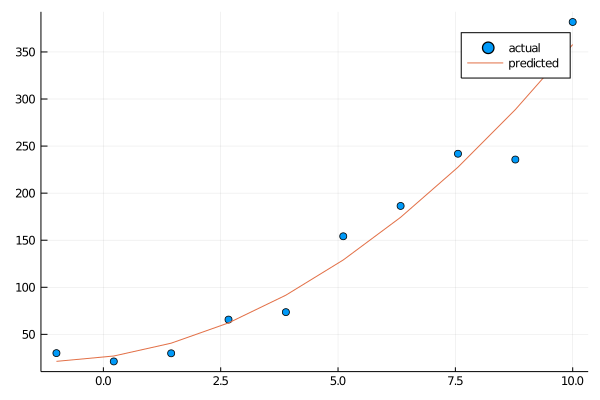

In [15]:
x = range(-1, stop = 10, length = 10)
a = 2.8
b = 7
c = 3.14
y = zeros(size(x))
y .+= a.* x.^2
y .+= x .* b
y .+= c
stochasticity = 50
y .+= 2stochasticity .* rand(size(x)[1]) .- stochasticity
scatter(x, y, label = "actual")

A, B, C = getABC(getAverages(x, y))
ypred = zeros(size(x))
ypred .+= A.* x.^2
ypred .+= x .* B
ypred .+= C
plot!(x, ypred, label = "predicted")

In [16]:
println([a, b, c], "±", stochasticity)
println(round.([A, B, C], digits = 2))
println([A, B, C])

[2.8, 7.0, 3.14]±50
[2.65, 6.72, 25.38]
[2.6524912408473527, 6.722280689684119, 25.38386495250693]


## Numerical Approach
As you have seen, these analytical solutions to least squares regression have been awfully complicated and very time consuming. I will now show you a much faster, but inexact route. Let's say we have a parabolic dataset, and we want to find the line of best fit for $ax^2 + bx + c$.

We'll create starting values, and do a loop that tunes $a$, $b$, and $c$ to get to a better solution. Also note that we will use absolute error verus squared error to prevent dramatic effects.

In [17]:
x = collect(range(-5, stop = 10, length = 100))
A = 4
B = -2.5
C = 40
y = A .* x.^2 .+ B .* x .+ C

a = 20rand() - 10
b = 20rand() - 10
c = 20rand() - 10

function cost(a, b, c)
    ypred = a .* x.^2 .+ b .* x .+ c
    return sum((ypred .- y).^2) / size(x)[1]
end


println("Actual values: a=", A, " b=", B, " c=", C)
println("Initial values: a=", a, " b=", b, " c=", c)
println("Initial cost: ", cost(a, b, c))


delta = 1e-10
epsilon = 1e-4
for i in 1:100000
    orig = cost(a, b, c)
    dCda = (cost(a + delta, b, c) - orig) / delta
    dCdb = (cost(a, b + delta, c) - orig) / delta
    dCdc = (cost(a, b, c + delta) - orig) / delta

    a -= epsilon * dCda
    b -= epsilon * dCdb
    c -= epsilon * dCdc
end

Actual values: a=4 b=-2.5 c=40
Initial values: a=-2.79192044576408 b=-2.1720185498603195 c=3.794575819624413
Initial cost: 78298.49662921998


Final cost: 4.846057803187255e-7
Final values: a=4.00002267580467 b=-2.500048806982961 c=39.99904217809892


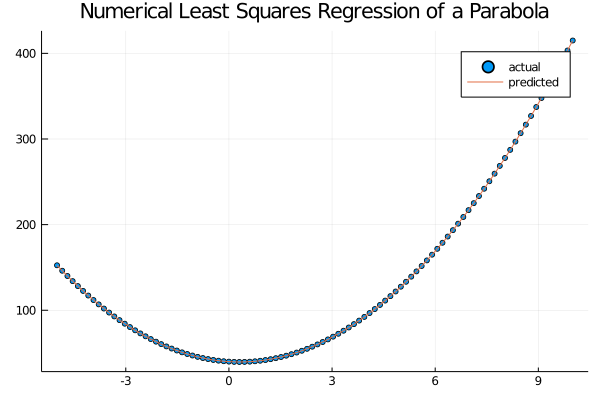

In [18]:
println("Final cost: ", cost(a, b, c))
println("Final values: a=", a, " b=", b, " c=", c)
scatter(x, y, label = "actual", markersize = 3, title = "Numerical Least Squares Regression of a Parabola")
plot!(x, (a .* x.^2 .+ b .* x .+ c), label = "predicted")

## N-Dimensionality
The line is parameterized with 2 variables, $m$ and $b$, and the parabola has 3 variables. The regression problem for a 2 or 3 parameter cost function could theoretically be solved by graphing a plane of the potential solutions, and finding the lowest point. The problem with this is that as you go into higher dimensions you cannot easily visualize the 4th or 5th parameter.

The same principle is seen when trying to manually take 10 or 100 partial derivatives by hand, and solving a system of equations with that many unknowns. Although, the numerical solution is pretty scalable with iteration, but still grows very complicated very quickly. To solve this problem, one must vectorize.

Let's take an n-dimensional example. A dataset has points in the form of $(\vec{x}, y)$. Now we'll assign weights to each of these inputs to calculate the average stored in a vector $\vec{m}$, making the prediction function the dot product of these weights and inputs. We'll also add a b-term to account for non-centered data, or a "y-intercept".
$$
f(\vec{x}) = \vec{x}\cdot\vec{m} = m_1x_1 + m_2x_2 + m_3x_3 + ... + m_nx_n + b
$$

Unfortunately, this is only for one sample, so we must use a matrix $X$ to store each point in a row, and each column of that row will have $x_1$, $x_2$, and so on. Therefore, our matrix will be $m$ rows by $n$ columns, with $m$ samples and $n$ inputs. We can write the y values in a vector as well. Additionally, we know that there will not be a perfect fit, so we will have a vector $\vec{e}$ that stores the difference between the predicted and actual outputs, and we want to minimize the magnitude of this vector.

$$
\vec{y} = X\vec{m} + \vec{e} \\
\vec{e} = \vec{y} - X\vec{m} \\
C(\vec{m}) = ||\vec{y} - X\vec{m}||^2
$$

$$
M = (X^TX)^{-1}X^TY
$$

# Conclusion (for now)
You have now seen both approaches to regression, analytical and numerical. There's certainly a tradeoff because one gives an exact solution, yet takes hours, and the other gives a quick, low-effort approximation. It is also worth noting that the computational solution took quite a bit of tuning to arrive at the solution. Much more complicated models exist to both automatically tune the parameters and find an optimal solution. Data science has much more math to offer, but I think this was a good learning experience for me to look behind the scenes of basic regression.